# 라이브러리 및 데이터 불러오기

In [58]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("./data/preprocessed_second_cookie_cat.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30482 entries, 0 to 30481
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30482 non-null  int64 
 1   userid          30482 non-null  int64 
 2   version         30482 non-null  object
 3   sum_gamerounds  30482 non-null  int64 
 4   retention_1     30482 non-null  bool  
 5   retention_7     30482 non-null  bool  
dtypes: bool(2), int64(3), object(1)
memory usage: 1012.2+ KB


In [4]:
df

,Unnamed: 0,userid,version,sum_gamerounds,retention_1,retention_7
0,1,337,gate_30,38,True,False
1,2,377,gate_40,165,True,False
2,4,488,gate_40,179,True,True
3,5,540,gate_40,187,True,True
4,8,1574,gate_40,108,True,True
...,...,...,...,...,...,...
30477,90171,9997757,gate_30,84,True,False
30478,90175,9998125,gate_30,30,False,False
30479,90177,9998376,gate_40,53,False,False
30480,90184,9999441,gate_40,97,True,False


# gate_30 / gate_40 - Paired Sample T-Test

$$H_{0}: \mu_{30}-\mu_{40}=0$$
$$H_{a}: \mu_{30}-\mu_{40}\neq0$$

## 등분산 검정

In [5]:
gate_30_rounds = df[df["version"] == "gate_30"]["sum_gamerounds"]
gate_40_rounds = df[df["version"] == "gate_40"]["sum_gamerounds"]

In [6]:
_,p_value_levene = stats.levene(gate_30_rounds, gate_40_rounds)

In [7]:
if p_value_levene > 0.05:
    print(p_value_levene, "등분산 가정 만족")
else:
    print(p_value_levene, "이분산 가정 만족")

8.294327867813097e-05 이분산 가정 만족


## T-Test 수행

In [8]:
t, p_value = stats.ttest_ind(
    a = gate_30_rounds,
    b = gate_40_rounds,
    alternative = "two-sided",
    equal_var = False
)

In [9]:
print(f"p-value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

p-value : 3.9867252049915826e-34
귀무가설 기각 : True


# version / retention_1 - Chi Square Test

귀무가설 : version 과 retention_1은 독립이다.  
대립가설 : version 과 retention_1은 독립이 아니다.

## 분할표 및 상대 도수 분할표 그리기

In [10]:
retention_1_c_table = pd.crosstab(df["version"], df["retention_1"],
                     margins = True)

In [11]:
retention_1_c_table

retention_1,False,True,All
version,,,
gate_30,3314,13341,16655
gate_40,2348,11479,13827
All,5662,24820,30482


In [12]:
retention_1_rfc_table = pd.crosstab(df["version"], df["retention_1"],
                        margins = True, normalize = True)

In [13]:
retention_1_rfc_table

retention_1,False,True,All
version,,,
gate_30,0.108720,0.437668,0.546388
gate_40,0.077029,0.376583,0.453612
All,0.185749,0.814251,1.000000


## Chi Square Test 수행

In [14]:
chi2_statistics, p_value, _, _ = chi2_contingency(retention_1_c_table)

In [15]:
print(f"Chi Squeare Statistic : {chi2_statistics}")
print(f"P-Value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

Chi Squeare Statistic : 42.492866889872545
P-Value : 1.3184133422717052e-08
귀무가설 기각 : True


# version / retention_7 - Chi Square Test

귀무가설 : version 과 retention_7은 독립이다.  
대립가설 : version 과 retention_7은 독립이 아니다.

## 분할표 및 상대 도수 분할표 그리기

In [16]:
retention_7_c_table = pd.crosstab(df["version"], df["retention_7"],
                     margins = True)

In [17]:
retention_7_c_table

retention_7,False,True,All
version,,,
gate_30,9348,7307,16655
gate_40,7120,6707,13827
All,16468,14014,30482


In [18]:
retention_7_rfc_table = pd.crosstab(df["version"], df["retention_7"],
                                   margins = True, normalize = True)

In [19]:
retention_7_rfc_table

retention_7,False,True,All
version,,,
gate_30,0.306673,0.239715,0.546388
gate_40,0.233580,0.220031,0.453612
All,0.540253,0.459747,1.000000


## Chi Square Test 수행

In [20]:
chi2_statistics, p_value, _, _, = chi2_contingency(retention_7_c_table)

In [21]:
print(f"Chi Squeare Statistic : {chi2_statistics}")
print(f"P-Value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

Chi Squeare Statistic : 65.31216510359596
P-Value : 2.2116026997878394e-13
귀무가설 기각 : True


# retention_1 / retention_7 - Chi Square Test

## 가설 설정

귀무가설 : retention_1 과 retention_7은 독립이다.  
대립가설 : retention_1 과 retention_7은 독립이 아니다.

## 분할표 및 상대 도수 분할표 그리기

In [24]:
retention_c_table = pd.crosstab(df["retention_1"], df["retention_7"],
                     margins = True)
retention_rfc_table = pd.crosstab(df["retention_1"], df["retention_7"],
                                   margins = True, normalize = True)

In [25]:
retention_c_table

retention_7,False,True,All
retention_1,,,
False,3535,2127,5662
True,12933,11887,24820
All,16468,14014,30482


In [26]:
retention_rfc_table

retention_7,False,True,All
retention_1,,,
False,0.115970,0.069779,0.185749
True,0.424283,0.389968,0.814251
All,0.540253,0.459747,1.000000


## Chi Square Test 수행

In [27]:
chi2_statistics, p_value, _, _, = chi2_contingency(retention_c_table)

In [28]:
print(f"Chi Squeare Statistic : {chi2_statistics}")
print(f"P-Value : {p_value}")
print(f"귀무가설 기각 : {p_value < 0.05}")

Chi Squeare Statistic : 197.93683268915615
P-Value : 1.0433396474397255e-41
귀무가설 기각 : True


# Result

### gate_30 접속율

In [24]:
gate_30_retention_1_t = df[(df["version"] == "gate_30") & (df["retention_1"] == True)]["retention_1"].count()
gate_30_retention_1_f = df[(df["version"] == "gate_30") & (df["retention_1"] == False)]["retention_1"].count()

In [25]:
gate_30_retention_7_t = df[(df["version"] == "gate_30") & (df["retention_7"] == True)]["retention_7"].count()
gate_30_retention_7_f = df[(df["version"] == "gate_30") & (df["retention_7"] == False)]["retention_7"].count()

In [26]:
print(f"1일 뒤 재접속 : {gate_30_retention_1_t} \n 재접속 없음 : {gate_30_retention_1_f}")

1일 뒤 재접속 : 13341 
 재접속 없음 : 3314


In [27]:
print(f"7일 뒤 재접속 : {gate_30_retention_7_t} \n 재접속 없음 : {gate_30_retention_7_f}")

7일 뒤 재접속 : 7307 
 재접속 없음 : 9348


In [28]:
print(f"1일 뒤 접속율 : {round((gate_30_retention_1_t / (gate_30_retention_1_t + gate_30_retention_1_f)) * 100, 2)}%")
print(f"1일 뒤 미접속율 : {round((gate_30_retention_1_f / (gate_30_retention_1_t + gate_30_retention_1_f)) * 100, 2)}%")
print("----------------------")
print(f"7일 뒤 접속율 : {round((gate_30_retention_7_t / (gate_30_retention_7_t + gate_30_retention_7_f)) * 100, 2)}%")
print(f"7일 뒤 미접속율 : {round((gate_30_retention_7_f / (gate_30_retention_7_t + gate_30_retention_7_f)) * 100, 2)}%")

1일 뒤 접속율 : 80.1%
1일 뒤 미접속율 : 19.9%
----------------------
7일 뒤 접속율 : 43.87%
7일 뒤 미접속율 : 56.13%


### gate_40 접속율

In [30]:
gate_40_retention_1_t = df[(df["version"] == "gate_40") & (df["retention_1"] == True)]["retention_1"].count()
gate_40_retention_1_f = df[(df["version"] == "gate_40") & (df["retention_1"] == False)]["retention_1"].count()

In [31]:
gate_40_retention_7_t = df[(df["version"] == "gate_40") & (df["retention_7"] == True)]["retention_1"].count()
gate_40_retention_7_f = df[(df["version"] == "gate_40") & (df["retention_7"] == False)]["retention_1"].count()

In [32]:
print(f"1일 뒤 재접속 : {gate_40_retention_1_t} \n 재접속 없음 : {gate_40_retention_1_f}")

1일 뒤 재접속 : 11479 
 재접속 없음 : 2348


In [33]:
print(f"1일 뒤 재접속 : {gate_40_retention_7_t} \n 재접속 없음 : {gate_40_retention_7_f}")

1일 뒤 재접속 : 6707 
 재접속 없음 : 7120


In [34]:
print(f"1일 뒤 접속율 : {round((gate_40_retention_1_t / (gate_40_retention_1_t + gate_40_retention_1_f)) * 100, 2)}%")
print(f"1일 뒤 미접속율 : {round((gate_40_retention_1_f / (gate_40_retention_1_t + gate_40_retention_1_f)) * 100, 2)}%")
print("----------------------")
print(f"7일 뒤 접속율 : {round((gate_40_retention_7_t / (gate_40_retention_7_t + gate_40_retention_7_f)) * 100, 2)}%")
print(f"7일 뒤 미접속율 : {round((gate_40_retention_7_f / (gate_40_retention_7_t + gate_40_retention_7_f)) * 100, 2)}%")

1일 뒤 접속율 : 83.02%
1일 뒤 미접속율 : 16.98%
----------------------
7일 뒤 접속율 : 48.51%
7일 뒤 미접속율 : 51.49%


In [43]:
tt = df[(df["retention_1"] == True) & (df["retention_7"] == True)]["userid"].count()

In [44]:
ff = df[(df["retention_1"] == False) & (df["retention_7"] == False)]["userid"].count()

In [45]:
tf = df[(df["retention_1"] == True) & (df["retention_7"] == False)]["userid"].count()

In [46]:
ft = df[(df["retention_1"] == False) & (df["retention_7"] == True)]["userid"].count()

In [49]:
print(f"1일 후 접속한 유저 중 7일 후 접속한 유저 : {tt}")
print(f"1일 후에 접속했지만 7일 후에 접속 안한 유저 : {tf}")
print(f"1일 후에는 접속 안했지만 7일 후에는 접속한 유저 : {ft}")
print(f"1일 후에도 7일 후에도 접속 안한 유저 : {ff}")

1일 후 접속한 유저 중 7일 후 접속한 유저 : 11887
1일 후에 접속했지만 7일 후에 접속 안한 유저 : 12933
1일 후에는 접속 안했지만 7일 후에는 접속한 유저 : 2127
1일 후에도 7일 후에도 접속 안한 유저 : 3535


In [50]:
gate_30_df = df[df["version"] == "gate_30"]

In [56]:
gate_40_df = df[df["version"] == "gate_40"]

Text(0.5, 1.0, '< gate_30 유저의 retention 비율 >')

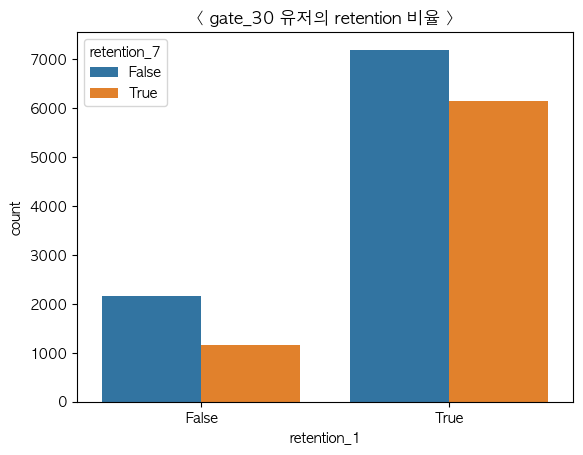

In [59]:
sns.countplot(data = gate_30_df, x = "retention_1", hue = "retention_7")
plt.title("< gate_30 유저의 retention 비율 >")

Text(0.5, 1.0, '< gate_40 유저의 retention 비율 >')

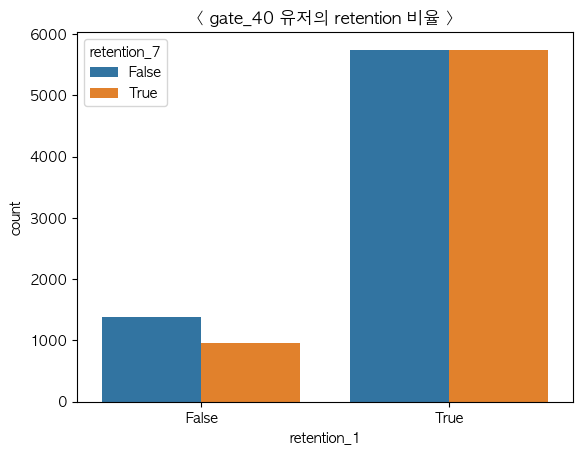

In [60]:
sns.countplot(data = gate_40_df, x = "retention_1", hue = "retention_7")
plt.title("< gate_40 유저의 retention 비율 >")